## Análise de Dados de Plataforma de Streaming (com Dados Gerados por IA)

In [1]:
#Import da biblioteca e leitura das bases de dados.
import pandas as pd

plataformas_df = pd.read_csv(r'C:\Users\joa_o\OneDrive\GitHub\Analise_de_dados\Plataform_streaming\plataformas_distribuicao.csv', sep = ';')

assinantes_df = pd.read_csv(r'C:\Users\joa_o\OneDrive\GitHub\Analise_de_dados\Plataform_streaming\assinantes.csv', sep = ';')

catalogo_df = pd.read_csv(r'C:\Users\joa_o\OneDrive\GitHub\Analise_de_dados\Plataform_streaming\catalogo_conteudo.csv', sep = ';')

historico_df = pd.read_csv(r'C:\Users\joa_o\OneDrive\GitHub\Analise_de_dados\Plataform_streaming\historico_visualizacoes_2024.csv', sep = ';')


## 1.Juntar Tabelas: Combine as tabelas para responder a perguntas como:

### Qual o gênero de filme/série mais assistido por assinantes Premium no Brasil?

In [2]:

def genero_mais_assistido_premium_brasil():
    combinado_df = historico_df.merge(assinantes_df, on = 'ID_Assinante', how = 'left')
    combinado_df = combinado_df.merge(catalogo_df, on = 'ID_Conteudo', how = 'left')

    assinantes_premium_brasil_df = combinado_df[(combinado_df['Plano_Assinatura'] == 'Premium') & (combinado_df['Pais'] == 'Brasil')]
    mais_assistido = assinantes_premium_brasil_df['Genero'].value_counts().reset_index()

    mais_assistido.columns = ['Genero', 'Numero_Visualizacoes']
    top_1 = mais_assistido.sort_values(by='Numero_Visualizacoes', ascending = False).iloc[0]
    resposta = (f'O genero de filmes e series mais assistido entre os assinantes Premium do Brasil é: {top_1['Genero']}!')
    return resposta
print(genero_mais_assistido_premium_brasil())
#display(genero_mais_assistido_premium_brasil())

O genero de filmes e series mais assistido entre os assinantes Premium do Brasil é: Ficcao Cientifica!


### Qual a plataforma de distribuição mais utilizada para assistir filmes de ficção científica?

In [3]:

def plataforma_mais_utilizada_para_ficcao():
    df_combinado = historico_df.merge(plataformas_df, on = 'ID_Plataforma')
    df_combinado = df_combinado.merge(catalogo_df, on = 'ID_Conteudo')

    filmes_ficcao = df_combinado[(df_combinado['Genero'] == 'Ficcao Cientifica')]
    plataforma_mais_utilizada = filmes_ficcao['Nome_Plataforma'].value_counts().reset_index()
    plataforma_mais_utilizada.columns = ['Nome_Plataforma', 'Utilizacao']
    top_1 = plataforma_mais_utilizada.sort_values(by = 'Utilizacao', ascending=False).iloc[0]

    resposta = (f'A plataforma mais utilizada para assistir filmes do genero "Ficção Científica" é: {top_1['Nome_Plataforma']}')
    return resposta
print (plataforma_mais_utilizada_para_ficcao())

A plataforma mais utilizada para assistir filmes do genero "Ficção Científica" é: Apple TV


### Qual o título com maior tempo total de visualização?


In [4]:
def titulo_com_maior_visualizacao():
    df_combinado = historico_df.merge(catalogo_df, on = 'ID_Conteudo')
    mais_assistido = df_combinado.groupby('Titulo').sum().reset_index()
    mais_assistido = mais_assistido[['Titulo','Minutos_Assistidos']]
    mais_assistido =  mais_assistido.sort_values(by = 'Minutos_Assistidos', ascending=False)
    top_1 = mais_assistido.sort_values(by = 'Minutos_Assistidos', ascending=False).iloc[0]
    resposta = (f'O título com maior tempo total de visualização é: "{top_1['Titulo']}" com {int(top_1['Minutos_Assistidos'])/60} horas de visualização!')
    return resposta

print (titulo_com_maior_visualizacao())

O título com maior tempo total de visualização é: "O Legado do Código" com 8.75 horas de visualização!


## 2.Filtrar e Selecionar:

### Liste os assinantes que se cadastraram em janeiro de 2024.


In [5]:
def assinantes_cadastrados_janeiro_2024(df):
    copia_df = df
    copia_df['Data_Inicio_Assinatura'] = pd.to_datetime(copia_df['Data_Inicio_Assinatura'])
    janeiro_2024_df = ((copia_df['Data_Inicio_Assinatura'].dt.year == 2024) & (copia_df['Data_Inicio_Assinatura'].dt.month == 1))
    assinantes_filtrados = copia_df[janeiro_2024_df][['Nome', 'Sobrenome', 'Data_Inicio_Assinatura']]
    
    return assinantes_filtrados

print(f'Assinantes que se cadastraram em Janeiro de 2024: \n{assinantes_cadastrados_janeiro_2024(assinantes_df)}')

Assinantes que se cadastraram em Janeiro de 2024: 
       Nome Sobrenome Data_Inicio_Assinatura
6  Gabriela     Nunes             2024-01-01


### Encontre os filmes com avaliação IMDb acima de 8.5 e duração superior a 2 horas.

In [6]:
def Avaliacao_e_mais_de_duas_horas(df):
    combinado_df = df[(df['Tipo_Conteudo'] == 'Filme') & (df['Avaliacao_Media_IMDb'] >= 8.5) & (df['Duracao_Minutos'] > 120)]
    combinado_df['Duracao_Horas']= (combinado_df['Duracao_Minutos']/60).round(2)
    correspondentes_df = combinado_df[['ID_Conteudo', 'Titulo', 'Duracao_Horas', 'Avaliacao_Media_IMDb']]
    return correspondentes_df

display(Avaliacao_e_mais_de_duas_horas(catalogo_df))

C:\Users\joa_o\AppData\Local\Temp\ipykernel_10364\147579920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combinado_df['Duracao_Horas']= (combinado_df['Duracao_Minutos']/60).round(2)


,ID_Conteudo,Titulo,Duracao_Horas,Avaliacao_Media_IMDb
0,1001,O Legado do Código,2.42,8.7
3,1004,A Ascensão do Dragao,3.00,9.3


### Quais visualizações não foram completas?

In [7]:
def visualizacao_incompleta():
    combinado_df = historico_df.merge(catalogo_df, on = 'ID_Conteudo')
    combinado_df = combinado_df.merge(assinantes_df, on = 'ID_Assinante')
    combinado_df = combinado_df[['ID_Visualizacao', 'ID_Assinante', 'Nome', 'Sobrenome', 'ID_Conteudo', 'Titulo', 'Completo']]
    visualizacao_incompleta_df = combinado_df[(combinado_df['Completo'] == 'Nao')]
    return visualizacao_incompleta_df

display(visualizacao_incompleta())

,ID_Visualizacao,ID_Assinante,Nome,Sobrenome,ID_Conteudo,Titulo,Completo
1,4002,2002,Bruno,Costa,1003,A Última Linha,Nao
3,4004,2004,Daniel,Lima,1001,O Legado do Código,Nao
8,4009,2009,Isabela,Ribeiro,1007,Entre Mundos,Nao
23,4024,2009,Isabela,Ribeiro,1011,Crônicas Esquecidas,Nao


## 3.Agrupar e Agregar: 


### Calcule o tempo médio de visualização por tipo de dispositivo.

In [8]:
def media_por_dispositivo():
    combinado_df = historico_df.merge(plataformas_df, on = 'ID_Plataforma')
    media_por_plataforma = (combinado_df.groupby('Nome_Plataforma')['Minutos_Assistidos'].mean().reset_index()).round(2)
    media_por_plataforma = media_por_plataforma.rename(columns={'Minutos_Assistidos' : 'Media_Minutos_Assistidos'})
    return media_por_plataforma

display(media_por_dispositivo())


,Nome_Plataforma,Media_Minutos_Assistidos
0,Apple TV,121.25
1,Console Playstation,110.00
2,Mobile Android,98.75
3,Mobile iOS,95.00
4,SmartTV LG,47.50
5,SmartTV Samsung,70.83
6,Web Browser,68.33


### Quantos assinantes temos por país?

In [9]:
def quantidade_assinantes_por_pais(df):
    df_combinado = df[['Pais']]
    df_combinado['QTD_Assinaturas'] = ((df['ID_Assinante']*0) + 1)
    df_combinado = df_combinado.groupby('Pais').sum().reset_index()
    return df_combinado

display(quantidade_assinantes_por_pais(assinantes_df))


C:\Users\joa_o\AppData\Local\Temp\ipykernel_10364\2694964971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combinado['QTD_Assinaturas'] = ((df['ID_Assinante']*0) + 1)


,Pais,QTD_Assinaturas
0,Argentina,1
1,Brasil,9
2,EUA,2
3,Mexico,1
4,Portugal,2


### Qual o total gasto mensalmente pelos assinantes por tipo de plano?

In [10]:
def total_por_plano(df):
    df_combinado = df[['Plano_Assinatura', 'Gasto_Mensal_USD']]
    df_combinado['QTD_Assinaturas'] = ((df['ID_Assinante']*0) + 1)
    df_combinado = df_combinado.groupby('Plano_Assinatura').sum().reset_index()
    return df_combinado

display(total_por_plano(assinantes_df))

C:\Users\joa_o\AppData\Local\Temp\ipykernel_10364\752471640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combinado['QTD_Assinaturas'] = ((df['ID_Assinante']*0) + 1)


,Plano_Assinatura,Gasto_Mensal_USD,QTD_Assinaturas
0,Basico,59.94,6
1,Premium,99.95,5
2,Standard,59.96,4


## 4.Criar Novas Colunas:

### Adicione uma coluna com a idade do assinante.

In [11]:
from datetime import datetime 
assinantes_df = assinantes_df
assinantes_df['Data_Nascimento'] = pd.to_datetime(assinantes_df['Data_Nascimento'])
data_atual = pd.to_datetime(datetime.now().strftime('%Y-%m-%d'))
assinantes_df ['Idade']= data_atual.year - (assinantes_df['Data_Nascimento']).dt.year
aniversario = (assinantes_df['Data_Nascimento'].dt.month > data_atual.month) |((assinantes_df['Data_Nascimento'].dt.month == data_atual.month)&(assinantes_df['Data_Nascimento'].dt.day > data_atual.day))
assinantes_df.loc[aniversario, 'Idade'] -= 1
display(assinantes_df)


,ID_Assinante,Nome,Sobrenome,Email,Data_Nascimento,Plano_Assinatura,Data_Inicio_Assinatura,Pais,Cidade,Gasto_Mensal_USD,Status_Assinatura,Idade
0,2001,Ana,Silva,ana.s@email.com,1985-03-10,Premium,2022-01-15,Brasil,Sao Paulo,19.99,Ativo,40
1,2002,Bruno,Costa,bruno.c@email.com,1992-11-22,Basico,2023-05-20,Brasil,Rio de Janeiro,9.99,Ativo,32
2,2003,Carla,Souza,carla.s@email.com,1978-07-01,Standard,2021-08-01,Portugal,Lisboa,14.99,Ativo,46
3,2004,Daniel,Lima,daniel.l@email.com,2000-01-05,Basico,2024-02-10,Brasil,Belo Horizonte,9.99,Ativo,25
4,2005,Elisa,Martins,elisa.m@email.com,1995-09-18,Premium,2023-11-01,EUA,New York,19.99,Ativo,29
5,2006,Felipe,Gomes,felipe.g@email.com,1980-04-30,Standard,2022-06-25,Brasil,Brasilia,14.99,Ativo,45
6,2007,Gabriela,Nunes,gabriela.n@email.com,1998-12-12,Basico,2024-01-01,Argentina,Buenos Aires,9.99,Ativo,26
7,2008,Hugo,Pereira,hugo.p@email.com,1975-02-28,Premium,2021-03-05,Brasil,Curitiba,19.99,Ativo,50
8,2009,Isabela,Ribeiro,isabela.r@email.com,1990-06-07,Standard,2023-09-15,Portugal,Porto,14.99,Inativo,35
9,2010,Joao,Santos,joao.s@email.com,1988-10-10,Basico,2022-04-10,Brasil,Salvador,9.99,Ativo,36


### Calcule o percentual de cada filme/série que foi assistido (Minutos Assistidos / Duração Total).

In [12]:
def percentual_assistido():
    df_combinado = historico_df.merge(catalogo_df, on = 'ID_Conteudo')
    df_combinado = df_combinado[['Titulo', 'Duracao_Minutos', 'Minutos_Assistidos']]
    df_combinado = df_combinado.groupby('Titulo').mean().reset_index()
    df_combinado['Percentual'] = ((df_combinado['Minutos_Assistidos'])/(df_combinado['Duracao_Minutos']))
    df_combinado["Percentual"] = (df_combinado['Percentual'].map('{:.2%}'.format))
    return df_combinado
display(percentual_assistido())

,Titulo,Duracao_Minutos,Minutos_Assistidos,Percentual
0,A Ascensão do Dragao,180.0,180.00,100.00%
1,A Teia Invisível,105.0,105.00,100.00%
2,A Última Linha,50.0,40.00,80.00%
3,Crônicas Esquecidas,60.0,45.00,75.00%
4,Entre Mundos,55.0,37.50,68.18%
5,Marés da Vida,50.0,50.00,100.00%
6,Memórias de Outono,95.0,95.00,100.00%
7,O Caso do Hotel,45.0,45.00,100.00%
8,O Enigma da Piramide,130.0,130.00,100.00%
9,O Legado do Código,145.0,131.25,90.52%


## 5.Tratar Dados Nulos: 


### Substitua os valores nulos na coluna Avaliacao_Usuario por uma média ou valor padrão.

In [13]:
media_avaliacao = historico_df['Avaliacao_Usuario'].mean()
historico_df['Avaliacao_Usuario'].fillna(int(media_avaliacao), inplace = True)
display(historico_df)

C:\Users\joa_o\AppData\Local\Temp\ipykernel_10364\356592317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  historico_df['Avaliacao_Usuario'].fillna(int(media_avaliacao), inplace = True)


,ID_Visualizacao,ID_Assinante,ID_Conteudo,ID_Plataforma,Data_Visualizacao,Hora_Inicio,Minutos_Assistidos,Completo,Avaliacao_Usuario
0,4001,2001,1001,301,2024-01-05,10:30:00,145,Sim,5.0
1,4002,2002,1003,302,2024-01-05,19:00:00,30,Nao,4.0
2,4003,2003,1002,303,2024-01-06,14:15:00,110,Sim,5.0
3,4004,2004,1001,302,2024-01-06,22:00:00,90,Nao,3.0
4,4005,2005,1004,304,2024-01-07,09:45:00,180,Sim,5.0
5,4006,2006,1005,301,2024-01-07,17:30:00,40,Sim,4.0
6,4007,2007,1001,306,2024-01-08,11:00:00,145,Sim,5.0
7,4008,2008,1006,305,2024-01-08,20:10:00,130,Sim,4.0
8,4009,2009,1007,307,2024-01-09,13:00:00,20,Nao,4.0
9,4010,2010,1008,302,2024-01-09,21:40:00,95,Sim,4.0


## 6.Visualizar Dados: 



### Crie gráficos que mostrem a distribuição de assinantes por plano.

C:\Users\joa_o\AppData\Local\Temp\ipykernel_10364\3284771692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combinado['QTD_Assinatura'] = ((assinantes_df['ID_Assinante']*0) + 1)


<Axes: xlabel='Plano_Assinatura,QTD_Assinatura'>

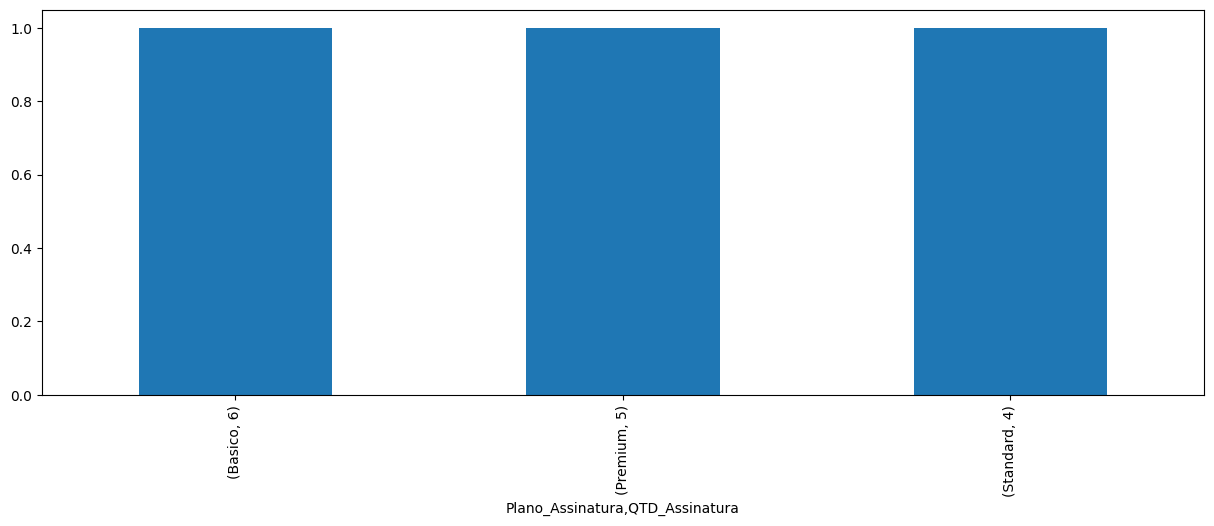

In [14]:
import matplotlib.pyplot as plt
def grafico_assinantes_por_plano():
    df_combinado = assinantes_df
    df_combinado = assinantes_df[['Plano_Assinatura']]
    df_combinado['QTD_Assinatura'] = ((assinantes_df['ID_Assinante']*0) + 1)
    df_combinado = df_combinado.groupby('Plano_Assinatura').sum().reset_index()
    df_combinado = df_combinado.groupby('Plano_Assinatura').value_counts()
    return df_combinado.plot(figsize=(15, 5), kind='bar' )

grafico_assinantes_por_plano()

### Compare o tempo médio de visualização entre diferentes gêneros.

<Axes: title={'center': 'Média de Minutos Assistidos por Gênero'}, xlabel='Gênero', ylabel='Média de Minutos Assistidos'>

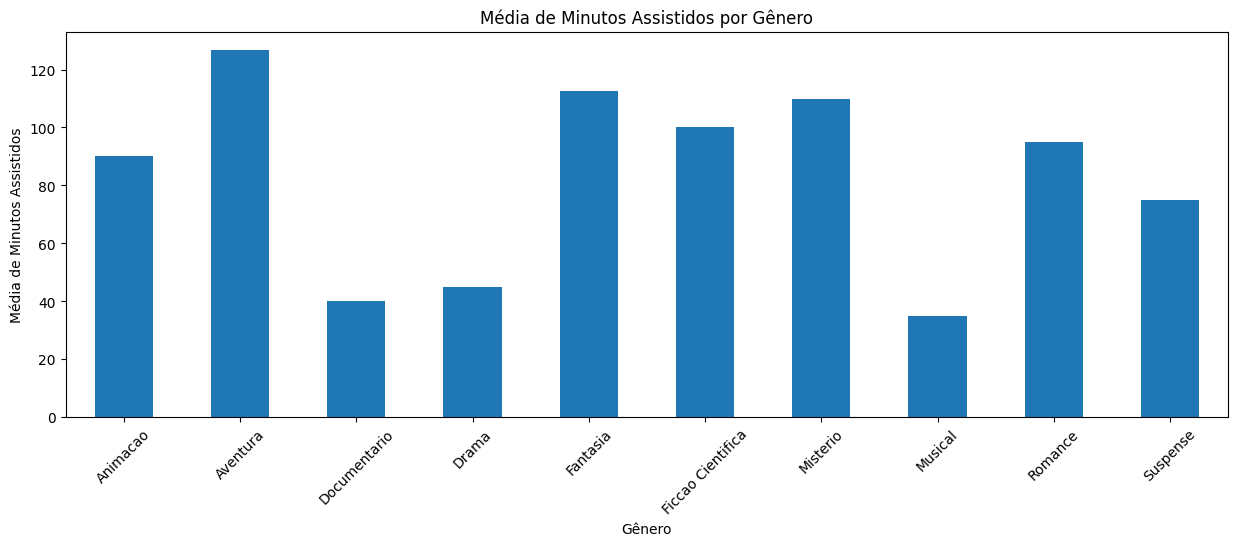

In [15]:
def tempo_visualizacao_por_genero():
    df_combinado = historico_df.merge(catalogo_df)

    df_combinado = df_combinado.groupby('Genero')['Minutos_Assistidos'].mean().round(2)


    return df_combinado.plot(figsize=(15, 5), kind='bar',title='Média de Minutos Assistidos por Gênero',
        xlabel='Gênero',
        ylabel='Média de Minutos Assistidos',
        rot=45 )

tempo_visualizacao_por_genero()